In [15]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from pyhdf.SD import SD, SDC
# from pyhdf.
import h5py 

# Load File

In [25]:
DATASET_FOLDER = '../datasets/'
FILE_NAME = 'SMAP_L2_SM_P_NRT_51467_D_20240919T161423_N17701_002.h5'

h5 = h5py.File(DATASET_FOLDER + FILE_NAME, 'r')

In [43]:
h5['/Soil_Moisture_Retrieval_Data']['soil_moisture'][:]
# h5['/Soil_Moisture_Retrieval_Data']['soil_moisture_option1']
# h5['/Soil_Moisture_Retrieval_Data']['soil_moisture_option2']
# h5['/Soil_Moisture_Retrieval_Data']['soil_moisture_option3']

array([-9999., -9999., -9999., ..., -9999., -9999., -9999.], dtype=float32)

In [48]:
import requests
header = {'Accept': 'application/json'} # Use following for a csv response: header = {'Accept': 'text/csv'}

response = requests.get("https://daacdata.apps.nsidc.org/DATASETS/SMAP/SPL2SMP_NRT.107/", headers=header)

body = response.text

In [49]:
body

"500 Internal Server Error\nIf you are the administrator of this website, then please read this web application's log file and/or the web server's log file to find out what went wrong."

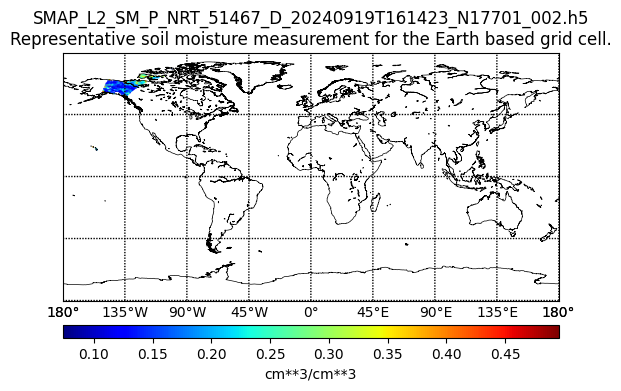

In [45]:
with h5py.File(DATASET_FOLDER + FILE_NAME, mode="r") as f:
    name = '/Soil_Moisture_Retrieval_Data/soil_moisture_option2'
    data = f[name][:]
    units = f[name].attrs['units']
    units = units.decode('ascii', 'replace')
    long_name = f[name].attrs['long_name']
    long_name = long_name.decode('ascii', 'replace')
    _FillValue = f[name].attrs['_FillValue']
    valid_max = f[name].attrs['valid_max']
    valid_min = f[name].attrs['valid_min']        
    invalid = np.logical_or(data > valid_max,
                            data < valid_min)
    invalid = np.logical_or(invalid, data == _FillValue)
    data[invalid] = np.nan
    data = np.ma.masked_where(np.isnan(data), data)
        
    # Get the geolocation data
    latitude = f['/Soil_Moisture_Retrieval_Data/latitude'][:]
    longitude = f['/Soil_Moisture_Retrieval_Data/longitude'][:]

        
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-90, urcrnrlat=90,
                llcrnrlon=-180, urcrnrlon=180)
    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(-90, 91, 45))
    m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
    m.scatter(longitude, latitude, c=data, s=1, cmap=plt.cm.jet,
            edgecolors=None, linewidth=0)
    cb = m.colorbar(location="bottom", pad='10%')    
    cb.set_label(units)

    basename = os.path.basename(FILE_NAME)
    plt.title('{0}\n{1}'.format(basename, long_name))
    fig = plt.gcf()

In [21]:
h5.get('Brightness_Temperature')

<HDF5 group "/Brightness_Temperature" (94 members)>